# Tutourial to cross match new detections with known asteroids

## Imports

In [1]:
import kete
import astropy
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file

from AsteroidChecker import AsteroidChecker

In [2]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [3]:
# Load a fits
frame = fits.open("NGC_2403_beta_g.fits")[0]
frame.data = frame.data.T
frame_wcs = WCS(frame.header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


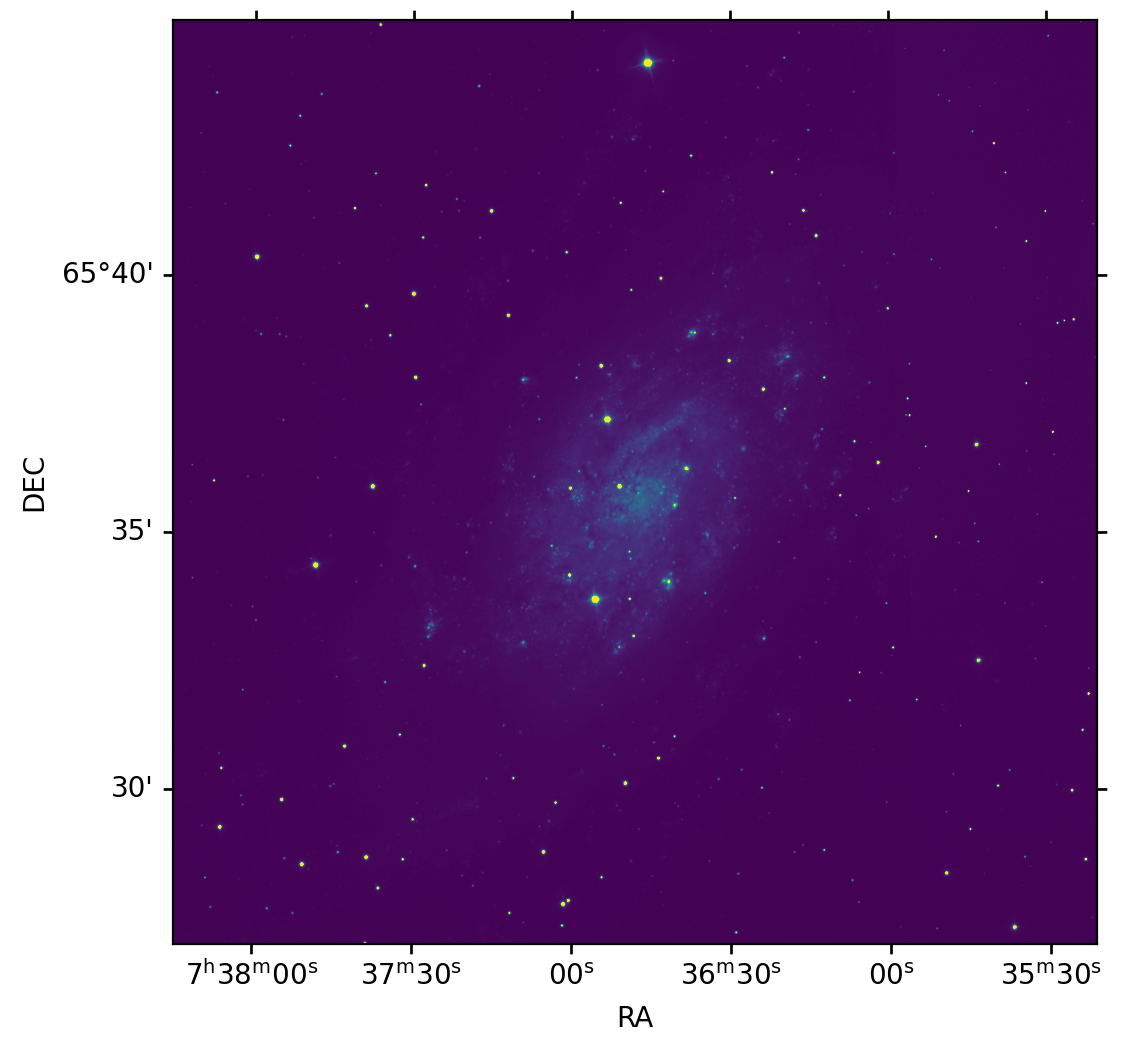

In [4]:
wcs = kete.irsa.plot_fits_image(frame,  cmap='viridis')

In [5]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 114.2 65.6 
CRPIX : 1364.0 1364.0 
CD1_1 CD1_2  : -0.000109999999404 0.0 
CD2_1 CD2_2  : 0.0 0.000109999999404 
NAXIS : 2727  2727

## Initialize asteroid checker

This fetches all the state information fromt the DB and creates the state objects

In [19]:
%%time
ac = AsteroidChecker() 

CPU times: user 4.3 s, sys: 492 ms, total: 4.79 s
Wall time: 5.5 s


## Get list of asteroids in the FOV on February 24, 2025

In [20]:
jd = kete.Time.from_ymd(2025, 2, 24).jd # We are spoofing the date - this could be the original date the image was taken too.
asteroid_list = ac.get_asteroid_list(wcs, jd)
asteroid_list

[]

In [21]:
if len(asteroid_list) != 0:
    
    vis = asteroid_list[0]
    wcs = kete.irsa.plot_fits_image(frame, percentiles=(40, 99))

    for idx in range(len(vis)):
        vec = vis.obs_vecs[idx].as_equatorial #* astropy.units.AU
        kete.irsa.annotate_plot(wcs, vec.ra, vec.dec, style='+',text=vis[idx].desig)
        a, b = frame_wcs.world_to_pixel(SkyCoord(vec.ra, vec.dec, unit='deg'))
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

## Get list of asteroids in the FOV at the time the image was taken

In this section, we will recreate the example from the kete tuoturial (https://caltech-ipac.github.io/kete/tutorials/palomar.html)

In [11]:
jd = kete.Time.from_ymd(2025, 2, 24).jd # We are spoofing the date - this could be the original date the image was taken too.
jd = 2433622.977
asteroid_list = ac.get_asteroid_list(wcs, jd)
asteroid_list

Impact detected between Name("2020 VT4") <-> earth at time 2459167.223591586 (2020-11-13T17:20:49.129+00:00)
Impact detected between Name("2024 XA") <-> earth at time 2460645.9118303847 (2024-12-01T09:51:52.961+00:00)


[SimultaneousStates(states=<1 States>, fov=GenericRectangle(pointing=Vector([-0.169339787251, 0.707956974246, 0.685653672834], Ecliptic), observer=State(desig="earth", jd=2433622.977, pos=[0.24694653941975703, 0.9536775022361177, 0.0001113415992564093], vel=[-0.016941276483053866, 0.004253141981546288, 7.175499093241451e-7], frame=Ecliptic, center_id=10), lon_width=0.29996931319342923, lat_width=0.2999693131936837))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


114.42782371308151 65.53063476763612


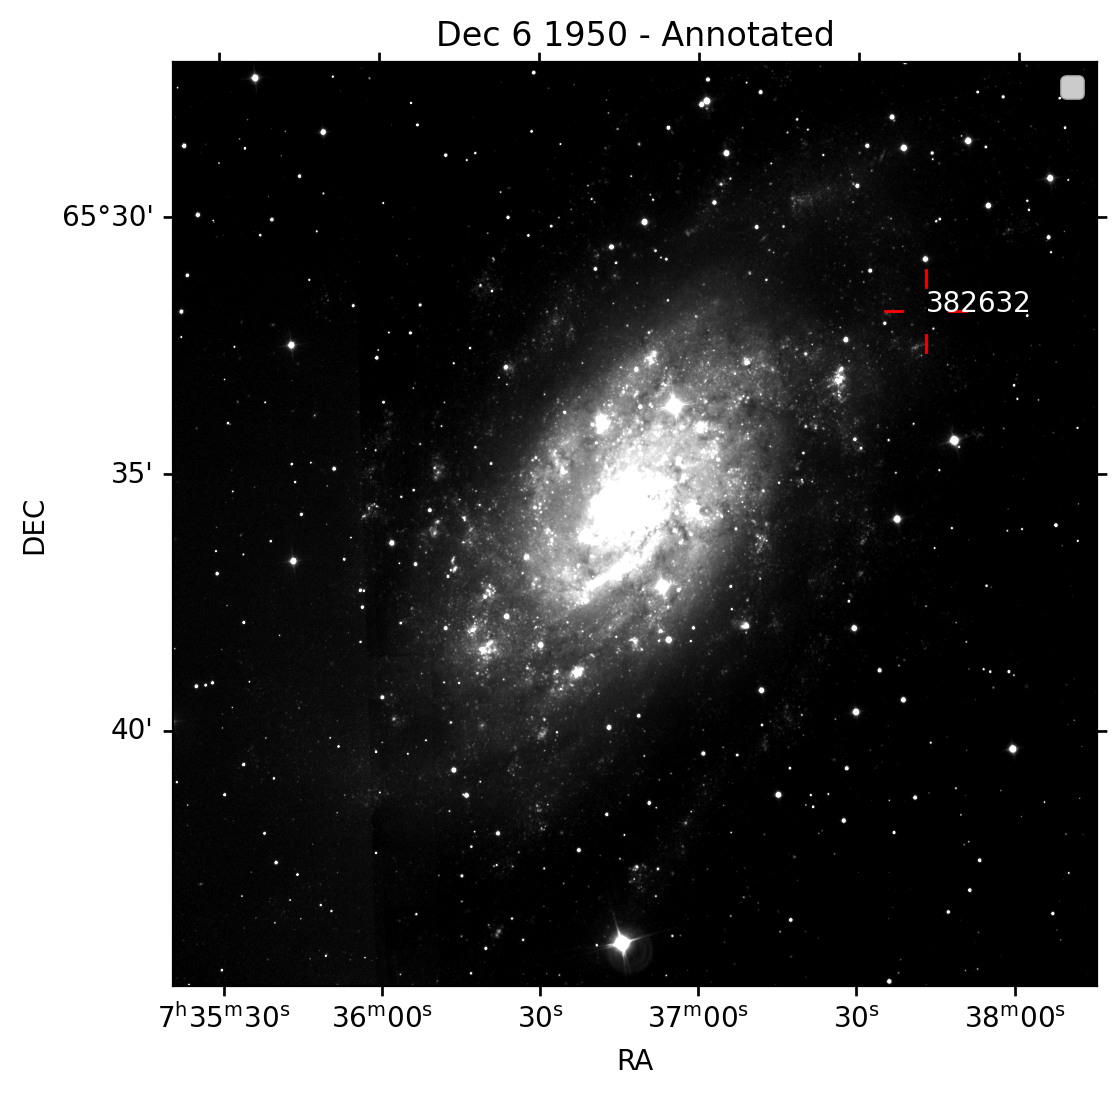

In [17]:
if len(asteroid_list) != 0:
    
    vis = asteroid_list[0]
    wcs = kete.irsa.plot_fits_image(frame, percentiles=(40, 99))

    for idx in range(len(vis)):
        vec = vis.obs_vecs[idx].as_equatorial #* astropy.units.AU
        kete.irsa.annotate_plot(wcs, vec.ra, vec.dec, style='+',text=vis[idx].desig)
        a, b = frame_wcs.world_to_pixel(SkyCoord(vec.ra, vec.dec, unit='deg'))
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.title("Dec 6 1950 - Annotated")
    plt.legend()